In [45]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Data Preparation

In [46]:
keyword_set = pd.read_pickle("../../data/keyword_set.pkl")

### Apriori algorithm

In [47]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [48]:
te = TransactionEncoder()
te_result = te.fit(keyword_set).transform(keyword_set)

In [5]:
key_df = pd.DataFrame(te_result, columns=te.columns_)

In [13]:
itemset = apriori(key_df, min_support=0.005, use_colnames=True)

In [17]:
def itemset_ngram(itemset, n):
    for idx, item in enumerate(itemset.itemsets):
        if len(item) == n:
            idx
            break 
    itemset_ngram = itemset[:idx]
    return itemset_ngram

In [31]:
from mlxtend.frequent_patterns import association_rules
apriori_result = association_rules(itemset_ngram(itemset, 3), metric="lift", min_threshold=1)
apriori_result

In [33]:
apriori_result.to_excel("./result/total_apriori005_single_result.xlsx")

In [61]:
apriori_result = pd.read_excel("./result/total_apriori_result.xlsx")

In [3]:
# apriori_result = pd.read_excel("./result/Pohang0712_apriori_result.xlsx")

In [80]:
apriori_result

,Unnamed: 0,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,0,frozenset({'감소'}),frozenset({'도시'}),0.036397,0.171218,0.006824,0.187501,1.095096,0.000593,1.020040
1,1,frozenset({'도시'}),frozenset({'감소'}),0.171218,0.036397,0.006824,0.039858,1.095096,0.000593,1.003605
2,2,frozenset({'발생'}),frozenset({'감소'}),0.161950,0.036397,0.007959,0.049145,1.350260,0.002065,1.013407
3,3,frozenset({'감소'}),frozenset({'발생'}),0.036397,0.161950,0.007959,0.218674,1.350260,0.002065,1.072600
4,4,frozenset({'감소'}),frozenset({'사업'}),0.036397,0.307167,0.011520,0.316517,1.030438,0.000340,1.013679
...,...,...,...,...,...,...,...,...,...,...
2583,2583,"frozenset({'주민', '주민들'})","frozenset({'지역', '피해'})",0.057388,0.038165,0.006973,0.121509,3.183788,0.004783,1.094872
2584,2584,frozenset({'피해'}),"frozenset({'지역', '주민', '주민들'})",0.082286,0.034915,0.006973,0.084742,2.427136,0.004100,1.054441
2585,2585,frozenset({'지역'}),"frozenset({'주민', '피해', '주민들'})",0.487078,0.010981,0.006973,0.014316,1.303719,0.001624,1.003384
2586,2586,frozenset({'주민'}),"frozenset({'지역', '피해', '주민들'})",0.178869,0.008965,0.006973,0.038984,4.348618,0.005370,1.031237


In [82]:
def set_to_list(df_series):
    rtr_lst = []
    for item in df_series:
        item = str(item)
        item = item.replace("frozenset", "")
        item = item.replace("{", "")
        item = item.replace("}", "")
        item = item.replace("(", "")
        item = item.replace(")", "")
        item = item.replace("'", "")
        item = item.replace(" ", "")
        splited = item.split(",")
        temp = []
        for tok in splited:
            temp.append(tok.replace(" ", ""))
        rtr_lst.append(temp)

    return rtr_lst

apriori_result['antecedents'] = set_to_list(apriori_result['antecedents'])
apriori_result['consequents'] = set_to_list(apriori_result['consequents'])


In [83]:
apriori_result

,Unnamed: 0,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,0,[감소],[도시],0.036397,0.171218,0.006824,0.187501,1.095096,0.000593,1.020040
1,1,[도시],[감소],0.171218,0.036397,0.006824,0.039858,1.095096,0.000593,1.003605
2,2,[발생],[감소],0.161950,0.036397,0.007959,0.049145,1.350260,0.002065,1.013407
3,3,[감소],[발생],0.036397,0.161950,0.007959,0.218674,1.350260,0.002065,1.072600
4,4,[감소],[사업],0.036397,0.307167,0.011520,0.316517,1.030438,0.000340,1.013679
...,...,...,...,...,...,...,...,...,...,...
2583,2583,"[주민, 주민들]","[지역, 피해]",0.057388,0.038165,0.006973,0.121509,3.183788,0.004783,1.094872
2584,2584,[피해],"[지역, 주민, 주민들]",0.082286,0.034915,0.006973,0.084742,2.427136,0.004100,1.054441
2585,2585,[지역],"[주민, 피해, 주민들]",0.487078,0.010981,0.006973,0.014316,1.303719,0.001624,1.003384
2586,2586,[주민],"[지역, 피해, 주민들]",0.178869,0.008965,0.006973,0.038984,4.348618,0.005370,1.031237


In [ ]:
key_set = []
for item in keyword_set:
    item = str(item)
    item = item.replace("{", "")
    item = item.replace("}", "")
    item = item.replace("'", "")
    splited = item.split(",")
    temp = []
    for tok in splited:
        temp.append(tok.replace(" ", ""))
    key_set.append(temp)

In [51]:
network_data = apriori_result[['antecedents', 'consequents', 'lift']]

In [52]:
network_data

,antecedents,consequents,lift
0,frozenset({'도시'}),frozenset({'감소'}),1.095096
1,frozenset({'감소'}),frozenset({'도시'}),1.095096
2,frozenset({'감소'}),frozenset({'발생'}),1.350260
3,frozenset({'발생'}),frozenset({'감소'}),1.350260
4,frozenset({'감소'}),frozenset({'사업'}),1.030438
...,...,...,...
277,frozenset({'지역경제'}),frozenset({'활성화'}),6.246681
278,frozenset({'피해'}),frozenset({'지자체'}),1.085332
279,frozenset({'지자체'}),frozenset({'피해'}),1.085332
280,frozenset({'활성화'}),frozenset({'지자체'}),1.602270


### Visualize network

In [36]:
import matplotlib.pyplot as plt
import networkx as nx

In [37]:
node_lst = []
for node in network_data['antecedents']:
    node_lst.append(', '.join(list(node)))

In [38]:
graph = nx.DiGraph()
#graph.add_nodes_from(node_lst)
for i in range(len(network_data)):
    a, b, c = network_data.iloc[i, :]
    a = ', '.join(list(a))
    b = ', '.join(list(b))
    if c > 1:
        graph.add_edge(a, b, weight = round(c,3))
    # else:
    #     pass

In [39]:
import matplotlib.font_manager as fm
import matplotlib

font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path, size=18)
font_name = fm.FontProperties(fname="/usr/share/fonts/truetype/nanum/NanumGothic.ttf").get_name()

matplotlib.rcParams['font.family'] ='NanumGothic'
matplotlib.rcParams['axes.unicode_minus'] =False

In [40]:
edges,weights = zip(*nx.get_edge_attributes(graph,'weight').items())

In [41]:
pd.DataFrame(weights).quantile([0.99])

,0
0.99,4.142


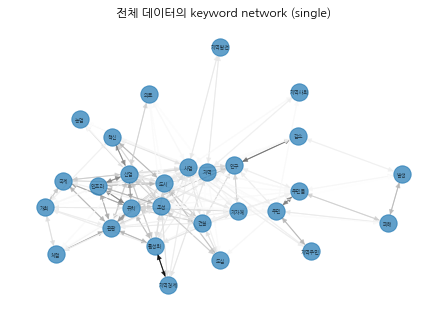

In [44]:
n_size = dict(graph.degree)
pos = nx.kamada_kawai_layout(graph)

nx.draw(graph, nodelist=n_size.keys(),
        with_labels = True, font_family = font_name, font_size = 5,
        alpha = 0.7,
        edgelist=edges, edge_color=weights, width=1, edge_cmap=plt.cm.binary)

# nx.write_graphml_lxml(graph, "Total_data_single_keyword_network.graphml")

plt.title("전체 데이터의 keyword network (single)")
#plt.show(block=False)
plt.savefig("total_single_network.png", format="PNG", dpi = 1000)